Found 300 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


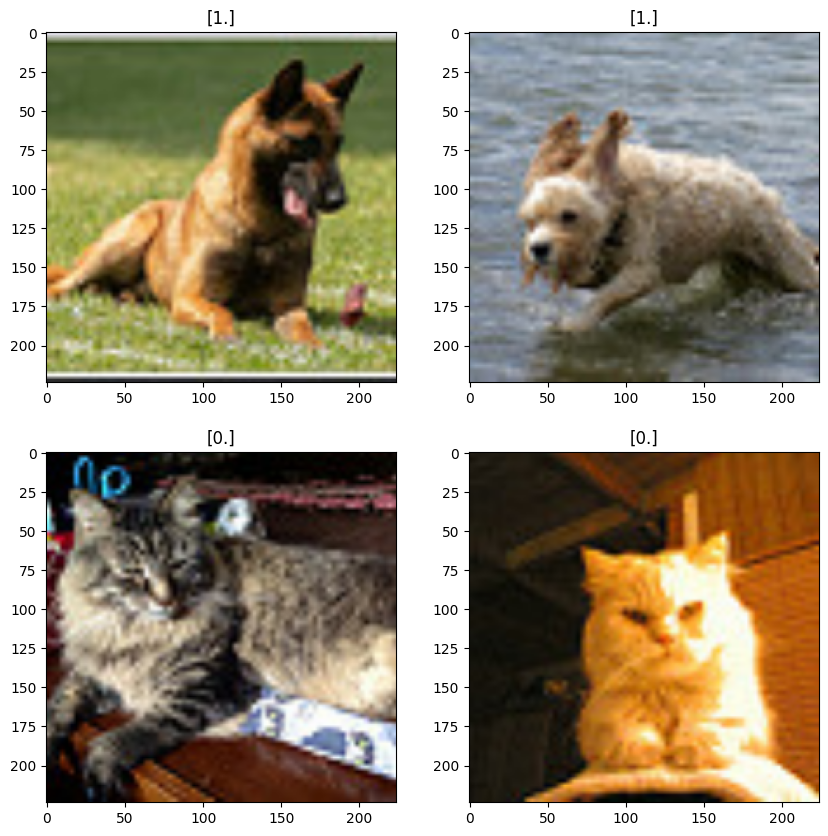

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 学習データの読み込み
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "dog_cat_photos/train",
  labels="inferred",
  label_mode="binary",
  image_size=(224, 224)
)

# テストデータの読み込み
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "dog_cat_photos/test",
  labels="inferred",
  label_mode="binary",
  image_size=(224, 224)
)

# データの確認
# print(list(train_dataset.as_numpy_iterator()))

image = []
label = []

plt.figure(figsize=(10, 10))
for i, data in enumerate(train_dataset.as_numpy_iterator()):
  if i >= 4: 
    break

  # データの表示
  image = data[0][0]
  label = data[1][0]
  ax = plt.subplot(2, 2, i + 1)
  plt.imshow(image.astype("uint8"))
  plt.title(label)


# trainデータの水増し
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    return image, label  

train_dataset_lr = train_dataset.map(augment)
train_dataset = train_dataset.concatenate(train_dataset_lr)





In [40]:
# モデルの構築
# MobileNetV2モデルを作成する
input_layer = tf.keras.Input(shape=(224, 224, 3))   # 入力層
l_layer = tf.keras.applications.mobilenet_v2.preprocess_input(input_layer)   # 前処理（正規化）をする層

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    input_tensor=l_layer,
    include_top=False,
    weights="imagenet",
    pooling='avg'
)
base_model.trainable = False

# Dense層を追加する
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

# base_modelに先ほどのDense層を追加したモデルを作成する
model = tf.keras.Sequential([
    base_model,
    output_layer
])

# modelをcompileする
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=["accuracy"])





In [41]:
# modelに学習させる
model.fit(train_dataset, epochs=20)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.8467 - loss: 0.3951
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.9833 - loss: 0.1288
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.9817 - loss: 0.0795
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.9917 - loss: 0.0601
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.9967 - loss: 0.0466
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 1.0000 - loss: 0.0377
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.9983 - loss: 0.0340
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 1.0000 - loss: 0.0281
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9983 - loss: 0.0246
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 1.0000 - loss: 0.0204
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 1.0000 - loss: 0.0184
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step

In [42]:
# テストデータで分類を実行する
pred_data = model.predict(test_dataset)
pred_data


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step


array([[9.99756396e-01],
       [7.68498925e-04],
       [9.99946713e-01],
       [9.97384250e-01],
       [7.15845614e-04],
       [8.98804356e-05],
       [5.28236444e-04],
       [9.98986304e-01],
       [4.37045358e-02],
       [5.47918389e-05],
       [3.32693657e-04],
       [5.88820362e-03],
       [1.11843416e-04],
       [9.95642960e-01],
       [1.02197221e-02],
       [9.99789536e-01],
       [2.73567298e-03],
       [9.99593556e-01],
       [7.50723541e-01],
       [1.31761536e-01],
       [2.81682820e-04],
       [9.99678612e-01],
       [1.48961111e-03],
       [9.97844160e-01],
       [9.99878109e-01],
       [9.28449392e-01],
       [2.15627602e-03],
       [9.99134362e-01],
       [1.40487216e-04],
       [2.33090267e-01],
       [2.15136606e-04],
       [3.76632495e-04],
       [9.99991775e-01],
       [9.99965787e-01],
       [1.96264288e-03],
       [1.75349502e-04],
       [9.94635820e-01],
       [9.84825194e-01],
       [2.71785632e-03],
       [9.97520566e-01],


In [43]:
# evaluate()でモデルの性能を評価する
model.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9800 - loss: 0.0640


[0.06398285180330276, 0.9800000190734863]